In [1]:
# 앞에 느낌표를 붙이면 프롬프트에서 실행한 것과 동일한 효과를 냄
# !pip install pandas
# !pip install sklearn

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class PerceptronGD(object):
    """
    매개변수
    -----------
    eta : float
     학습률 (0.0 과 1.0 사이)
    n_iter : int
     훈련 데이터 셋 반복 횟수
    random_state : int
     가중치 무작위 초기화를 위한 난수 생성기 시드
    
    속성
    ------------
    w_ : 1d-array
     학습된 가중치
    cost_ : list
     에포크마다 누적된 비용 함수의 제곱합 

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ------------
        X : array-like, shape = [n_sample, n_features]
         n_samples 개의 샘프과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_sample]
         타깃 값

        반환값
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)

            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        # 최종 입력 계산
        return np.dot(X, self.w_[1:] + self.w_[0])

    def activation(self, X):
        # 선형 활성화 계산
        return X

    def predict(self, X):
        # 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다.
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [4]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL: ', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail() # 마지막 5개의 데이터를 출력

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


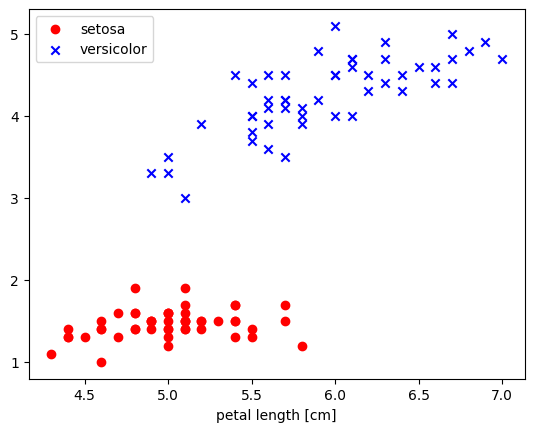

In [5]:
#setosa와 versicolor를 선택합니다.
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다.
X = df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다, setosa-음성 versicolor-양성
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('image/02_06.png', dpi=300)
plt.show()

In [6]:
model = PerceptronGD(n_iter=300, eta=0.0001)

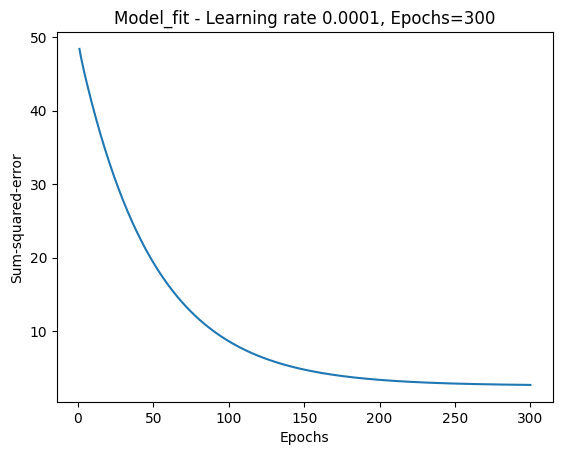

In [7]:
model_fit = model.fit(X, y)
plt.plot(range(1, len(model_fit.cost_) + 1), model_fit.cost_)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Model_fit - Learning rate 0.0001, Epochs=300')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\3018635569.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


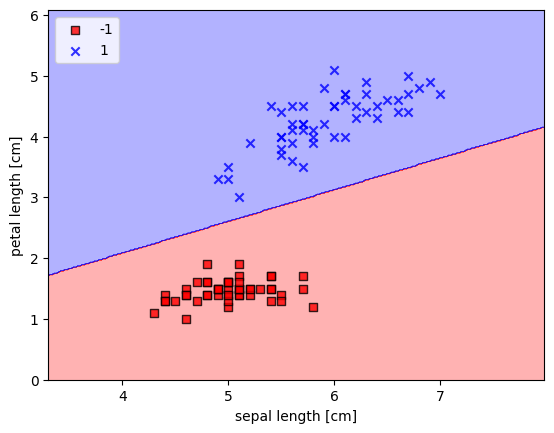

In [8]:
# week2_1
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 꽃받침 길이 최소/최대
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 꽃잎 길이 최소/최대
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

plot_decision_regions(X, y, classifier=model_fit)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

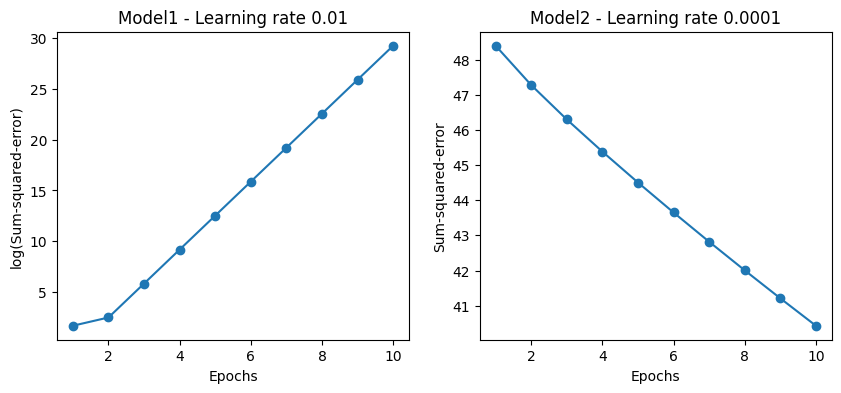

In [9]:
# week2_2
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

model1 = PerceptronGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(model1.cost_) + 1), np.log10(model1.cost_), marker='o')
# model1.cost 의 경우 너무 큰 값(10^20 이상)을 포함하고 있어 log 를 취함
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Model1 - Learning rate 0.01')

model2 = PerceptronGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(model2.cost_) + 1), model2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Model2 - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()


In [10]:
X_std = np.copy(X)
X_std[:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [11]:
model_std = PerceptronGD(n_iter=15, eta=0.01)
model_std.fit(X_std, y)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\3018635569.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


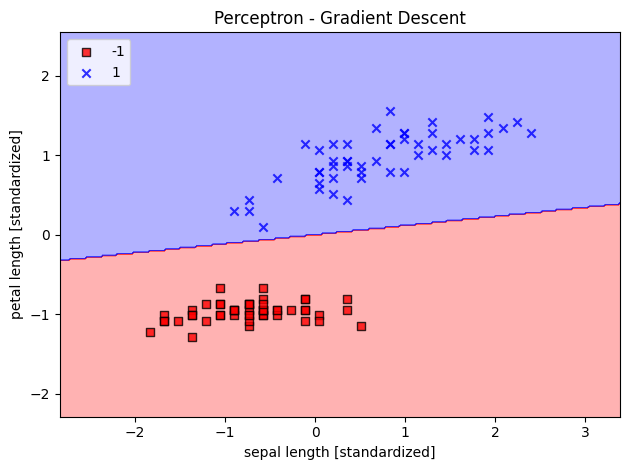

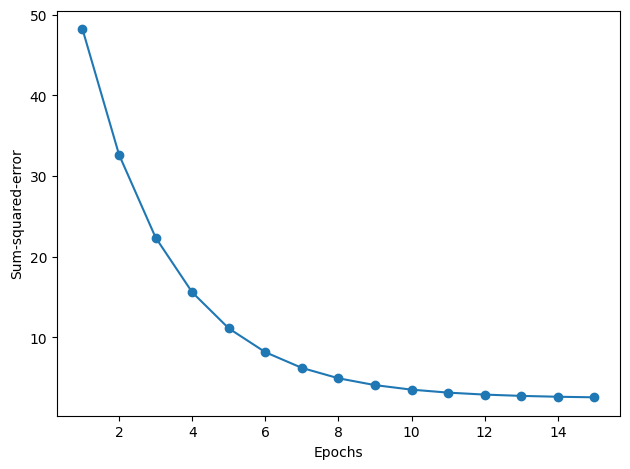

In [12]:
# week2_3

plot_decision_regions(X_std, y, classifier=model_std)
plt.title('Perceptron - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(model_std.cost_) + 1), model_std.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

In [13]:
class PerceptronSGD(object):
    """
    Parameters
    -----------
    eta : float
     학습률 (0.0 과 1.0 사이)
    n_iter : int
     훈련 데이터 셋 반복 횟수
    shuffle : bool (default: True)
     True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다.
    random_state : int
     가중치 무작위 초기화를 위한 난수 생성기 시드
    
    Attributes
    ------------
    w_ : 1d-array
     학습된 가중치
    cost_ : list
     에포크마다 누적된 비용 함수의 제곱합 

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """훈련 데이터 학습
        매개변수
        ------------
        X : {array-like}, shape = [n_sample, n_features]
         n_samples 개의 샘프과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_sample]
         타깃 벡터

        반환값
        -------
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)

            cost = []

            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))

            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)

        return self

    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다."""
        if not self.w_initialized:
            self._initialzie_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다."""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다."""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """가중치를 업데이트합니다."""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        # 최종 입력 계산
        return np.dot(X, self.w_[1:] + self.w_[0])

    def activation(self, X):
        # 선형 활성화 계산
        return X

    def predict(self, X):
        # 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다.
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\3018635569.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


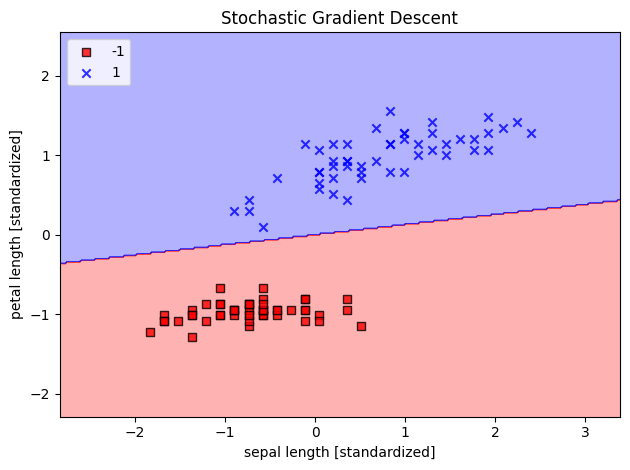

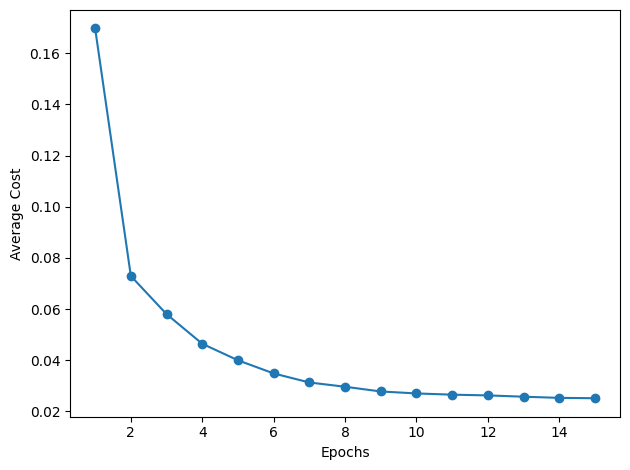

In [14]:
model_sgd = PerceptronSGD(n_iter=15, eta=0.01, random_state=1)
model_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=model_sgd)
plt.title('Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(model_sgd.cost_) + 1), model_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [15]:
model_sgd.cost_

[0.1696672012241066,
 0.07295566822144771,
 0.05804402765733625,
 0.04646387581878059,
 0.04001120043903278,
 0.034870667479422884,
 0.03133796869983207,
 0.029667753042192345,
 0.02782582316348252,
 0.027055082951522303,
 0.026574432871458845,
 0.02628750298830242,
 0.025778826933983822,
 0.02532703297569565,
 0.025182398238105894]

In [16]:
model_std.cost_

[48.2194540397314,
 32.65178819518995,
 22.377498682712368,
 15.596711759333218,
 11.121553526305782,
 8.16805543870446,
 6.218816886850197,
 4.932365763693897,
 4.083338593214491,
 3.5230008367021193,
 3.153191233087135,
 2.909125682735735,
 2.748048219397726,
 2.6417409213868046,
 2.5715806309514564]

In [17]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris() # 사이킷런에서 붓꽃 데이터셋을 적재

#입력 벡터의 특징으로는 세 번째 열의 꽃잎의 길이, 네 번째 열의 꽃잎의 너비 선택
X = iris.data[:, [2, 3]]
y = iris.target

# 클래스는 이미 정수 레이블로 변환
# 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 입니다.
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
# 70%는 훈련 데이터 30%는 테스트 데이터로 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수: %d" % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [21]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978
정확도: 0.978


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\3066288801.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


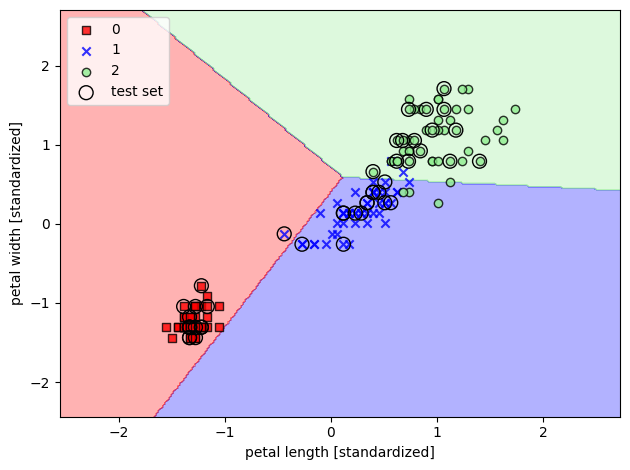

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()



In [23]:
class LogisticRegressionGD(object):
    """
    매개변수
    -----------
    eta : float
     학습률 (0.0 과 1.0 사이)
    n_iter : int
     훈련 데이터 셋 반복 횟수
    random_state : int
     가중치 무작위 초기화를 위한 난수 생성기 시드
    
    속성
    ------------
    w_ : 1d-array
     학습된 가중치
    cost_ : list
     에포크마다 누적된 비용 함수의 제곱합 

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ------------
        X : array-like, shape = [n_sample, n_features]
         n_samples 개의 샘프과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_sample]
         타깃 값

        반환값
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)

            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # 오차 제곱합
            # cost = (errors ** 2).sum() / 2.0
            # self.cost_.append(cost)

            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        # 최종 입력 계산
        return np.dot(X, self.w_[1:] + self.w_[0])

    def activation(self, z):
        # 선형 활성화 계산
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        # 단위 계단 함수를 사용하여 클래스 레이블을 반환합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        
        """임계값(0.5)을 기준으로 레이블 0과 1로 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\2849761795.py:57: RuntimeWarning: divide by zero encountered in log
  cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\3066288801.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


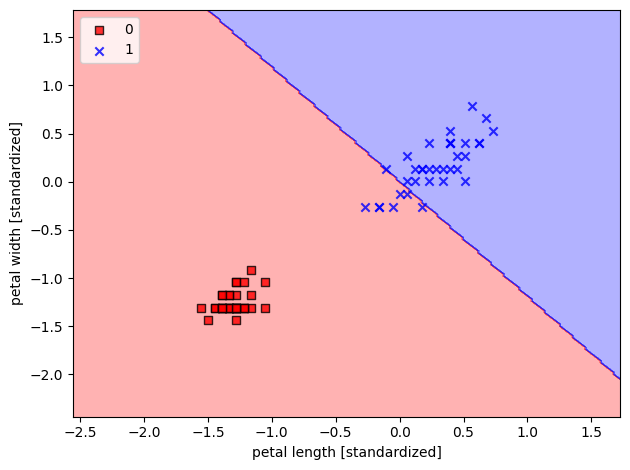

In [24]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                        y=y_train_01_subset,
                        classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [25]:
import numpy as np
import sys


class NeuralNetMLP(object):
    """피드포워드 신경망 / 다층 퍼셉트론 분류기
    
    매개변수
    
    -----------
    n_hidden : int (기본값 : 30)
        은닉 유닛 개수
    l2 : float (기본값 : 0.)
        L2 규제의 람다 값
        l2=0이면 규제 없음. (기본값)
    epoch :  int (기본값 :  100)
        훈련 세트를 반복할 횟수
    eta : float (기본값 : 0.001)
        학습률
    shuffle : bool (기본값: True)
        에포크마다 훈련세트를 섞을지 여부
        True이면 데이터를 섞어 순서를 바꿉니다
    minibatch_size : int (기본값: 1)
        미니 배치의 훈련 샘플 개수
    seed : int (기본값: None)
        가중치와 데이터 셔플링을 위한 난수 초깃값
        
    속성
    ---------
    eval_ : dixt
        훈련 에포크마다 비용, 훈령 정확도, 검증 정확도를 수집하기 위한 딕셔너리
        """
    def __init__(self, n_hidden=30,
                l2=0., epochs=100, eta=0.001, 
                shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """레이블을 원-핫 방식으로 인코딩합니다
        
        매개변수
        ----------
        y : 배열, 크기 = [n_samples]
            타깃 값.
        n_classes : int
            클래스 개수
        반환값
        ----------
        onehot : 배열, 크긱 = (n_example, n_labels)
        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """로지스틱 함수(시그모이드)를 계산합니다"""
        return 1. /  (1. + np.exp(-np.clip(z, -250,250)))

    def _forward(self, X):
        """정방향 계산을 수행합니다"""

        # 단계  1 : 은닉층의 최종 입력
        # [n_samples, n_feature] dot [n_feature, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # 단계 2 : 은닉층의 활성화 출력
        a_h = self._sigmoid(z_h)

        # 단계 3 : 출력층의 최종 입력
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]
        z_out = np.dot(a_h, self.w_out) + self.b_out

        # 단계 4 : 출력층의 활성화 출력
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """비용 함수를 계산합니다
        
        매개변수
        -----------
        y_enc : 배열, 크긱 = (n_samples, n_labels)
            원-핫 인코딩된 클래스 레이블
        output : 배열, 크기 = [n_samples, n_output_units]
            출력층의 활성화 출력 (정방향 계산)
            
        반환값
        -------------
        cost : float
            규제가 포함된 비용
        """
        L2_term = (self.l2 * 
                    (np.sum(self.w_h ** 2.) + 
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term

        # 다른 데이터셋에서는 극단적인 (0 또는 1에 가까운) 활성화 값이 나올 수 있습니다.
        # 파이썬과 넘파이의 수치 연산이 불안정하기 때문에
        # "ZeroDivisionError"가 발생할 수 있습니다.
        # 즉, log(0)을 평가하는 경우입니다.
        # 이 문제를 해결하기 위해 로그 함수에 전달되는 활성화 값에 작은 상수를 더합니다.
        #
        # 예를 들어 :
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. -y_enc) * np.log(1. - output + 1e-5)

        return cost

    def predict(self, X):
        """클래스 레이블을 예측합니다
        
        매개변수
        -----------
        X : 배열, 크기 = [n_example, n_features]
            원본 특성의 입력층
            
        반환값:
        ----------
        y_pred : 배열, 크기 = [n_samples]
            예측된 클래스 레이블
        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """훈련 데이터에서 가중치를 학습합니다
        
        매개변수
        -------------
        X_train : 배열, 크기 = [n_samples, n_features]
            원본 특성의 입력층
        X_train : 배열, 크기 = [n_samples]
            타깃 클래스 레이블
        X_valid : 배열, 크기 = [n_samples, n_features]
            훈련하는 동안 검증에 사용할 샘플 특성
        X_valid : 배열, 크기 = [n_samples]
            훈련하는 동안 검증에 사용할 샘플 레이블
        
        반환값:
        -------------
        self
        """
        n_output = np.unique(y_train).shape[0]  # number of  class labels
        n_features = X_train.shape[1]

        ###############
        # 가중치 초기화
        ###############

        # 입력층 -> 은닉층 사이의 가중치
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale = 0.1, 
                                        size=(n_features, self.n_hidden))

        # 은닉층 -> 출력층 사이의 가중치
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale = 0.1, 
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs)) # 출력 포맷을 위해
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # 훈련 에포크를 반복합니다
        for i in range(self.epochs):

            # 미니 배치로 반복합니다
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 
                                    1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # 정방향 계산
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ###########
                # 역전파
                ###########

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h + (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) * 
                            sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_examples, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # 규제와 가중치 업데이트
                delta_w_h = (grad_w_h + self.l2 * self.w_h)
                delta_b_h = grad_b_h # 편향은 규제하지 않습니다
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2 * self.w_out)
                delta_b_out = grad_b_out # 편향은 규제하지 않습니다
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out


                #################
                # 평가
                #################

                # 훈련하는 동안 에포크마다 평가합니다
                z_h, a_h, z_out, a_out = self._forward(X_train)

                cost = self._compute_cost(y_enc = y_train_enc,
                                            output=a_out)
                y_train_pred = self.predict(X_train)
                y_valid_pred = self.predict(X_valid)

                train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) / 
                X_train.shape[0])

                valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) / 
                X_valid.shape[0])

                sys.stderr.write('\r%0*d/%d | 비용: %.2f'
                                    '| 훈련/검증 정확도: %2f%%/%.2f%%' %
                                    (epoch_strlen, i+1, self.epochs, cost,
                                    train_acc*100, valid_acc*100))
                sys.stderr.flush()

                self.eval_['cost'].append(cost)
                self.eval_['train_acc'].append(train_acc)
                self.eval_['valid_acc'].append(valid_acc)
                
            return self

In [26]:

import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
        """'path'에서 MNIST 데이터 불러오기"""
        labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
        images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)

        with open(labels_path, 'rb') as lbpath:
            magic, n = struct.unpack('>II',
                                        lbpath.read(8))
            labels = np.fromfile(lbpath,
                                    dtype=np.uint8)
        
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",
                                                        imgpath.read(16))
            images = np.fromfile(imgpath,
                                    dtype=np.uint8).reshape(len(labels), 784)
            images = ((images / 255.) -.5) *2

        return images,labels


In [27]:
X_train,y_train = load_mnist('mnist', kind='train')
print('행: %d, 열: %d' % (X_train.shape[0], X_train.shape[1]))

행: 60000, 열: 784


In [28]:
X_test,y_test = load_mnist('mnist', kind='t10k')
print('행: %d, 열: %d' % (X_test.shape[0], X_test.shape[1]))

행: 10000, 열: 784


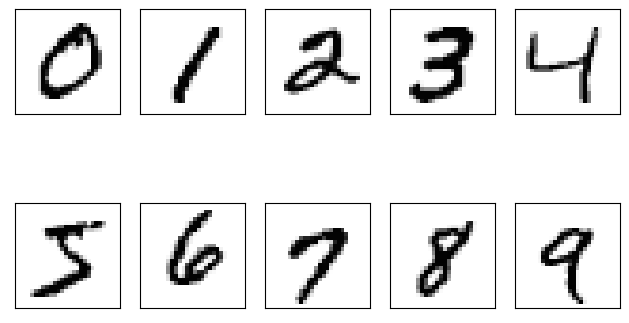

In [29]:
#4-1 각 클래스의 첫번째 이미지 출력
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

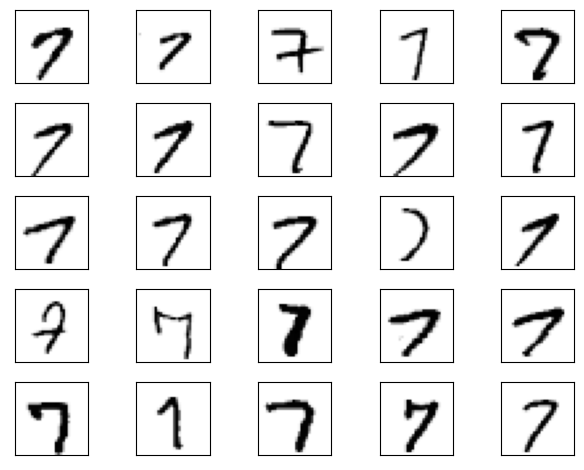

In [30]:
#4-2 숫자 7 샘플 25개를 그립니다:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

In [31]:
import numpy as np

np.savez_compressed('mnist_scaled.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [32]:
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [33]:
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train',
                                     'X_test', 'y_test']]

del mnist
print(X_train.shape)

(60000, 784)


In [34]:
n_epochs = 200

nn = NeuralNetMLP(n_hidden=100,
                    l2=0.01,
                    epochs=n_epochs,
                    eta=0.0005,
                    minibatch_size=100,
                    shuffle=True,
                    seed=1)

nn.fit(X_train=X_train[:55000],
        y_train=y_train[:55000],
        X_valid=X_train[55000:],
        y_valid=y_train[55000:])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\199257940.py:118: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\199257940.py:121: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  valid_acc = ((np.sum(y_valid == 

In [46]:
nn.epochs += 350

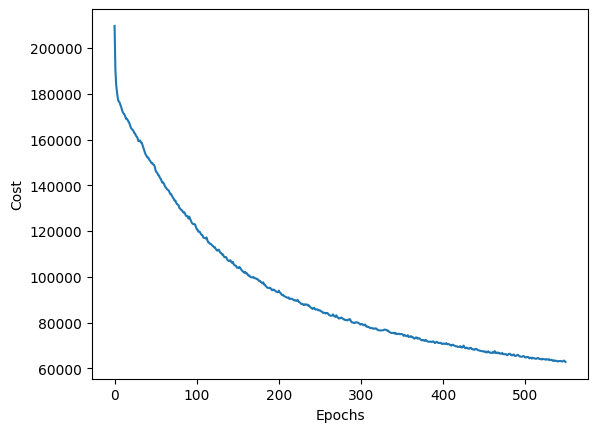

In [47]:
import matplotlib.pyplot as plt

plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
# plt.savefig('images/12_07.png', dpi=300)
plt.show()

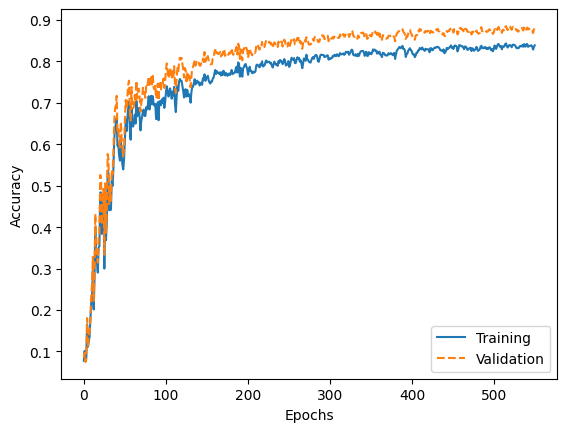

In [48]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'],
        label='Training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'],
        label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
# plt.savefig('images/12_08.png', dpi=300)
plt.show()

In [49]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred)
    .astype(np.float) / X_test.shape[0])

print('테스트 정확도: %.2f%%' % (acc * 100))

테스트 정확도: 85.12%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1528\3970167304.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.float) / X_test.shape[0])


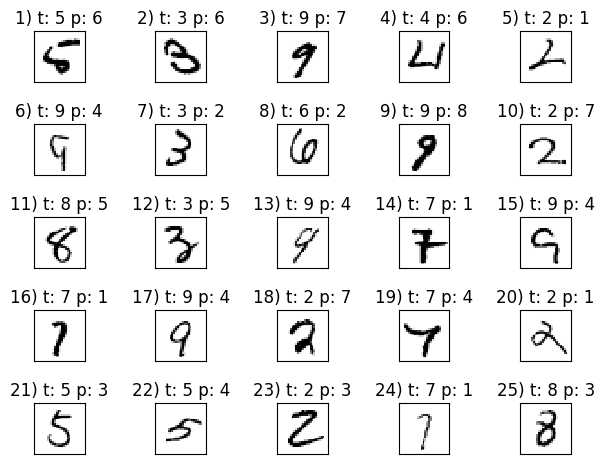

In [50]:
#miscl_img: y_test(타겟값) 과 y_test_pred(예측값)이 일치하지 않은 샘플의 이미지 데이터를 저장
#correct_lab: 타겟값과 예측값이 일치하지 않은 샘플의 타겟값 저장
#miscl_lab: 타겟값과 예측값이 일치하지 않은 샘플의 예측값 저장
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i + 1, correct_lab[i], miscl_lab[i]))
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_09.png', dpi=300)
plt.show()